# TABLE OF CONTENTS
[DATA CLEANING](#DATA_CLEANING)<br>
[EXPLORATORY_DATA_ANALYSIS](#EXPLORATORY_DATA_ANALYSIS)<br>
[LINEAR_REGRESSION](#LINEAR_REGRESSION)<br>

# DATA CLEANING


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import glob
import json

In [3]:
csvfiles = [i for i in glob.glob('*.{}'.format('csv'))]
csvfiles

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [5]:
all_dataframes = [] 
for f in csvfiles:  
    df = pd.read_csv(f,encoding='latin1')
    df['country'] = f[0:2]
    all_dataframes.append(df)
    
all_dataframes[4].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
1,zUZ1z7FwLc8,17.14.11,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯|""à¤ª...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"à¤ªà¥à¤°à¤¿à¤¯à¤¡à¥à¤¸ à¤à¥ à¤¸à¤®à¤¯, à¤ª...",IN
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN


In [6]:
for df in all_dataframes:
    df=df.astype({"video_id":'str',"trending_date":'str',"title":'str',"channel_title":'str',"category_id":'str',
                  "tags":'str',"thumbnail_link":'str',"description":'str','comments_disabled':'category','ratings_disabled':'category','video_error_or_removed':'category'}) 
    #df=df.astype({})

In [7]:
for df in all_dataframes:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
    df.insert(4, 'publish_date', df['publish_time'].dt.date) 
    df['publish_time'] = df['publish_time'].dt.time
for df in all_dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [8]:
all_dataframes[0].dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
publish_date              datetime64[ns]
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
dtype: object

In [9]:
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

In [10]:
combined_df = pd.concat(all_dataframes)
combined_df

,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,2018-05-18,15,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,2018-05-18,22,01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,2018-05-18,24,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


In [9]:
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False)
combined_df = combined_df.drop_duplicates('video_id',keep='first').set_index('video_id')

for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')
    
combined_df.head()

,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
hWthkZbmJP8,18.31.05,ÐÑÐµ Ð¿ÑÐ¾ Xiaomi Mi 8/Mi 8 SE Ð¸ Mi Band 3...,ÐÐ»Ð»Ð¾,2018-05-31,28,11:21:21,"xiaomi mi 8|""xiaomi mi 8 se""|""xiaomi mi 8 live...",39685,1444,127,326,https://i.ytimg.com/vi/hWthkZbmJP8/default.jpg,False,False,False,ÐÐ¾Ð½ÑÐ°Ð²Ð¸Ð»Ð¾ÑÑ Ð²Ð¸Ð´ÐµÐ¾? Ð¡ÑÐ°Ð²Ñ ...,RU
8ISFPXiV3HQ,18.31.05,LES VERSIONS OR/ARGENT DE 1997 LEAKÃES,Fildrong,2018-05-31,20,13:30:01,"fildrong|""pokÃ©mon""|""soleil""|""lune""|""sun""|""moo...",22108,1435,18,201,https://i.ytimg.com/vi/8ISFPXiV3HQ/default.jpg,False,False,False,LE LIEN DU DATAMINING POUR TOUT VOIR : https:/...,FR
v70z1jCZQuc,18.31.05,NOT a Food Challenge,Matt Stonie,2018-05-31,24,01:52:46,"Matt Stonie|""Megatoad""|""Competitive Eating""|""F...",641826,28399,1253,1834,https://i.ytimg.com/vi/v70z1jCZQuc/default.jpg,False,False,False,Donate Here!! -- https://give-sc.salvationarmy...,FR
tB7Gt6AUu0Y,18.31.05,à®°à®à®¿à®©à®¿ à®ªà¯à®²à¯ à®¨à®à®¿à®¤à¯à®...,NewsGlitz - Next Generation Tamil News Channel,2018-05-31,25,13:29:19,"tamil news|""tamilnadu politics comedy""|""tamil ...",212743,4484,666,783,https://i.ytimg.com/vi/tB7Gt6AUu0Y/default.jpg,False,False,False,When asked about Superstar Rajinikanth's talk ...,FR
NpuUfnxkPvY,18.31.05,ð Ramadan 2018 | La Recette Inratable Des M...,SANAMAKEUP,2018-05-30,22,11:30:19,"sanamakeup|""youtubeuse""|""beautÃ©""|""marocaine""|...",38110,3215,32,214,https://i.ytimg.com/vi/NpuUfnxkPvY/default.jpg,False,False,False,ââââââ DÃ©roule la barre d'infos â...,FR


In [10]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
        
combined_df['category_id']=combined_df['category_id'].astype('str')
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))

backup_df['category_id']=backup_df['category_id'].astype('str')
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

for df in all_dataframes:
    df['category_id']=df['category_id'].astype('str')
    df.insert(2, 'category', df['category_id'].map(category_id))
combined_df.head()

,trending_date,title,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,,
hWthkZbmJP8,18.31.05,ÐÑÐµ Ð¿ÑÐ¾ Xiaomi Mi 8/Mi 8 SE Ð¸ Mi Band 3...,Science & Technology,ÐÐ»Ð»Ð¾,2018-05-31,28,11:21:21,"xiaomi mi 8|""xiaomi mi 8 se""|""xiaomi mi 8 live...",39685,1444,127,326,https://i.ytimg.com/vi/hWthkZbmJP8/default.jpg,False,False,False,ÐÐ¾Ð½ÑÐ°Ð²Ð¸Ð»Ð¾ÑÑ Ð²Ð¸Ð´ÐµÐ¾? Ð¡ÑÐ°Ð²Ñ ...,RU
8ISFPXiV3HQ,18.31.05,LES VERSIONS OR/ARGENT DE 1997 LEAKÃES,Gaming,Fildrong,2018-05-31,20,13:30:01,"fildrong|""pokÃ©mon""|""soleil""|""lune""|""sun""|""moo...",22108,1435,18,201,https://i.ytimg.com/vi/8ISFPXiV3HQ/default.jpg,False,False,False,LE LIEN DU DATAMINING POUR TOUT VOIR : https:/...,FR
v70z1jCZQuc,18.31.05,NOT a Food Challenge,Entertainment,Matt Stonie,2018-05-31,24,01:52:46,"Matt Stonie|""Megatoad""|""Competitive Eating""|""F...",641826,28399,1253,1834,https://i.ytimg.com/vi/v70z1jCZQuc/default.jpg,False,False,False,Donate Here!! -- https://give-sc.salvationarmy...,FR
tB7Gt6AUu0Y,18.31.05,à®°à®à®¿à®©à®¿ à®ªà¯à®²à¯ à®¨à®à®¿à®¤à¯à®...,News & Politics,NewsGlitz - Next Generation Tamil News Channel,2018-05-31,25,13:29:19,"tamil news|""tamilnadu politics comedy""|""tamil ...",212743,4484,666,783,https://i.ytimg.com/vi/tB7Gt6AUu0Y/default.jpg,False,False,False,When asked about Superstar Rajinikanth's talk ...,FR
NpuUfnxkPvY,18.31.05,ð Ramadan 2018 | La Recette Inratable Des M...,People & Blogs,SANAMAKEUP,2018-05-30,22,11:30:19,"sanamakeup|""youtubeuse""|""beautÃ©""|""marocaine""|...",38110,3215,32,214,https://i.ytimg.com/vi/NpuUfnxkPvY/default.jpg,False,False,False,ââââââ DÃ©roule la barre d'infos â...,FR


# EXPLORATORY_DATA_ANALYSIS


### RATIO OF LIKES AND DISLIKES IN DIFFERENT CATEGORIES

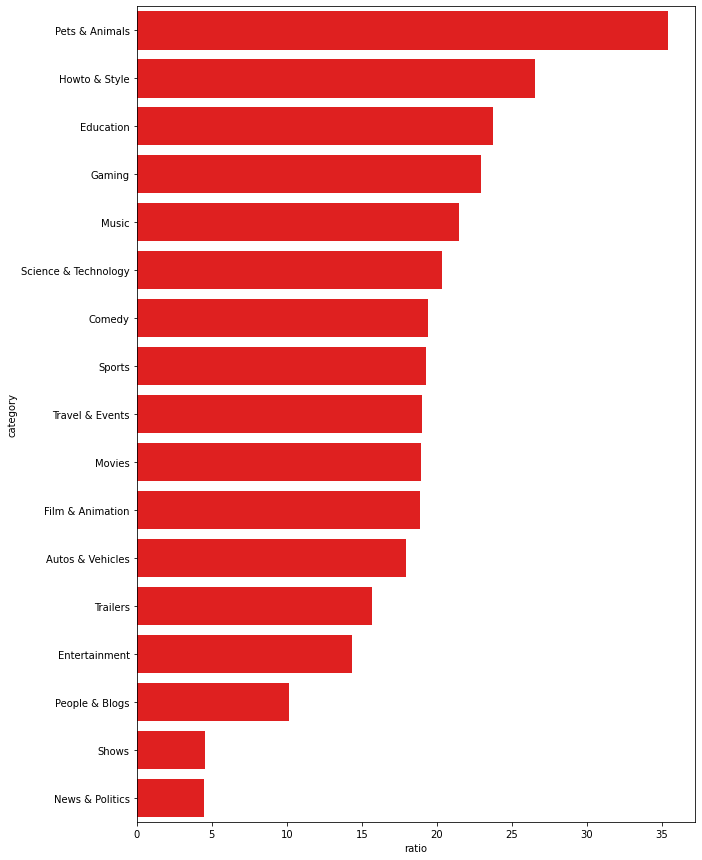

In [11]:
category_group=combined_df.groupby('category')
categorylist=[]
likeslist=[]
dislikeslist=[]
for category,df in category_group:
    categorylist.append(category)
    likeslist.append(sum(df['likes']))
    dislikeslist.append(sum(df['dislikes']))
likesdf=pd.DataFrame({'category':categorylist,'likes':likeslist}).set_index('category')
dislikesdf=pd.DataFrame({'category':categorylist,'dislikes':dislikeslist}).set_index('category')

ratio = [i / j for i, j in zip(likeslist, dislikeslist)] 
ratiodf = pd.DataFrame({'category':categorylist,'ratio':ratio}).set_index('category')
ratiodf=ratiodf.sort_values(by='ratio',ascending=False).reset_index()

plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf, color="r")
plt.show()

### FINDING WHICH CATEGORY VIDEOS ARE LIKED MOST BY THE USERS

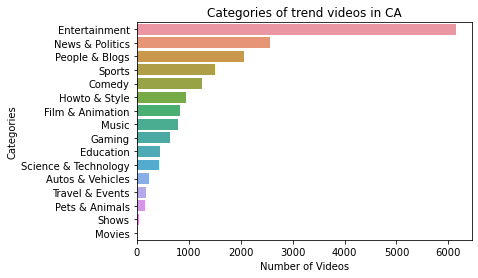

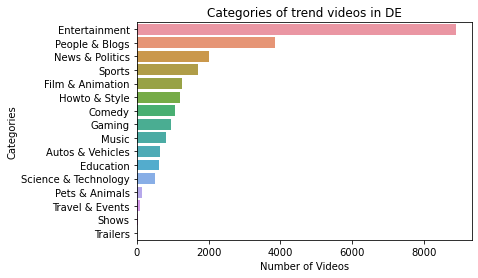

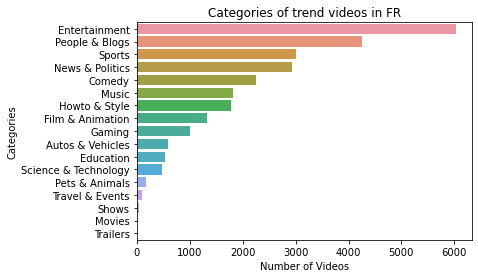

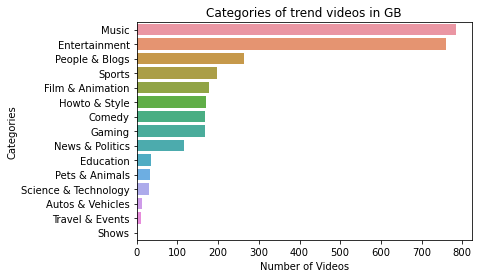

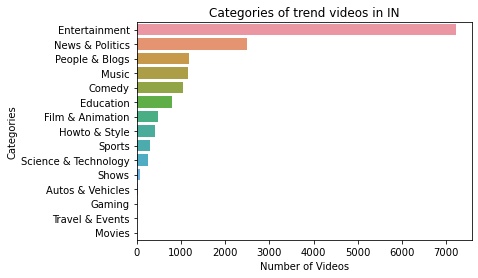

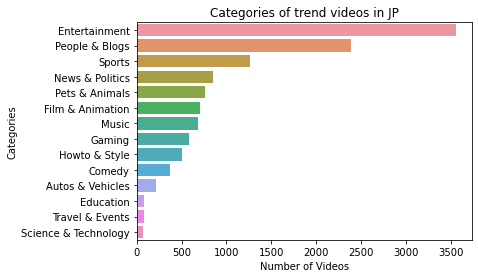

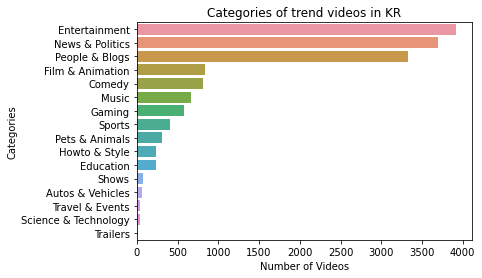

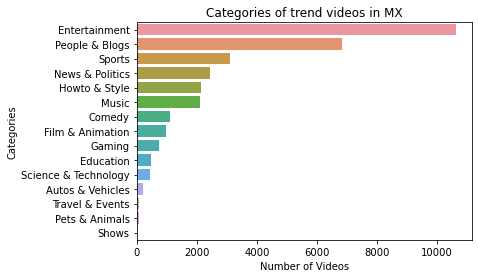

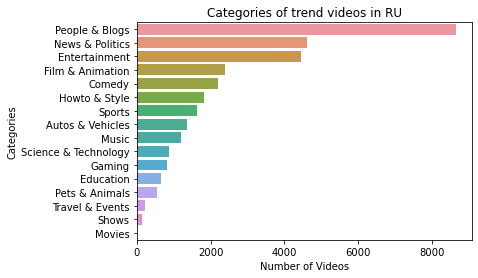

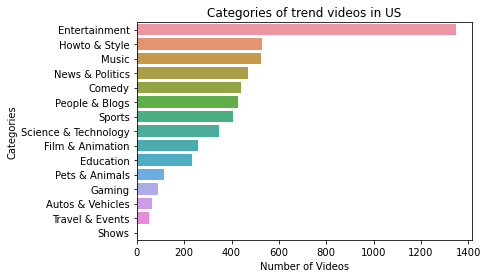

<Figure size 432x288 with 0 Axes>

In [25]:
country_group=combined_df.groupby('country')

for country,df in country_group:
    temporary = df['category'].value_counts().reset_index()
    ax = sns.barplot(y=temporary['index'], x=temporary['category'], data=temporary, orient='h')
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Categories of trend videos in " + country)
    plt.figure()

### TOP 5 TRENDING VIDEOS IN EACH COUNTRY BASED ON VIEWS AND LIKES

In [14]:
trendingview = []
trendinglikes = []
for df in all_dataframes:
    tempview = df
    templikes=df
    tempview = tempview.sort_values(by = 'views', ascending=False).reset_index()
    tempview.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    tempview.set_index('video_id',inplace=True)
    tempview = tempview.head(5)
    
    trendingview.append(tempview)
    templikes = templikes.sort_values(by = 'likes', ascending=False).reset_index()
    templikes.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    templikes.set_index('video_id',inplace=True)
    templikes = templikes.head(5)
    trendinglikes.append(templikes)
    
trendinglikes[4][['category', 'views', 'likes','country']]
#print(trendinglikes[5][['category', 'views', 'likes']])

,category,views,likes,country
video_id,,,,
7C2z4GqqS5E,Music,87430865,5150839,KR
FlsCjmMhFmw,Entertainment,113876217,2811223,KR
kTlv5_Bs8aw,Music,30583293,2611254,KR
6ZfuNTqbHE8,Entertainment,87450245,2584675,KR
p8npDG2ulKQ,Music,22612931,2533784,KR


# LINEAR_REGRESSION

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
df = all_dataframes[9]
y = df['views']

df.head()

,trending_date,title,category,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,Entertainment,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Entertainment,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,Entertainment,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(df, y, test_size=0.25,shuffle=False)

In [19]:
predictor = ["likes","dislikes"]
xTrain = xTrain[predictor]
xTest = xTest[predictor]

xTrain.head()

,likes,dislikes
video_id,,
2kyS6SvSYSE,57527,2966
1ZAPwfrtAFY,97185,6146
5qpjK5DgCt4,146033,5339
puqaWrEC7tY,10172,666
d380meD0W0M,132235,1989


In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(xTrain, yTrain)
prediction_values = lm.predict(xTest)
print(lm.intercept_)
print('regressor coffecient:',lm.coef_)

370043.4407393364
regressor coffecient: [21.13234212 24.172028  ]


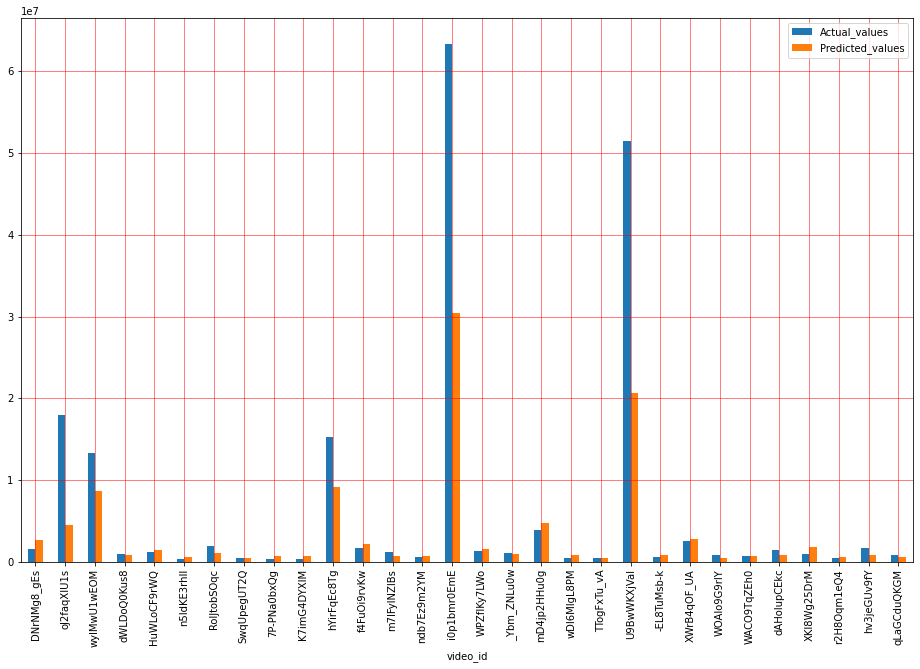

In [21]:
df1 = pd.DataFrame({'Actual_values': yTest, 'Predicted_values': prediction_values})
df2 = df1.head(30)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(linestyle='-', linewidth='0.5', color='red')
plt.show()

In [22]:
accuracy_LinearRegression=lm.score(xTest,yTest)
accuracy_LinearRegression

0.7089242063411438

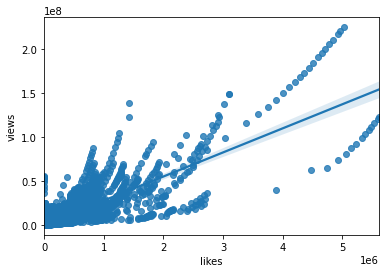

In [23]:
ax = sns.regplot(x="likes", y="views", data=df)

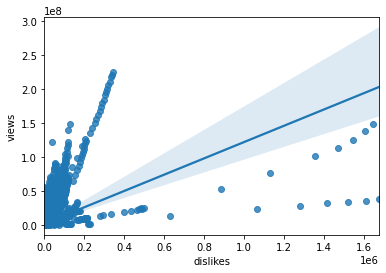

In [24]:
ax = sns.regplot(x="dislikes", y="views", data=df)